# Project 2 - Modeling a Curveball

In this project Justin Chen and I wanted to model a curveball using the same ODE, and RK4 methods that I had used in my previous project. The Major question I had in this project was how does velocity effect the displacement of a curveball. My hypothesis was that as you would increase the velocity you would decrease the displacement due to the decrease in time allowed for the spin to effect the balls trajectory

In [8]:
import ode #ode.py should be in the same folder as your notebook
import numpy as np
import matplotlib.pyplot as plt

In this following cell is where i declare the parameters or the constants in my equations. Certain things like the cross-sectional area and the mass, as well as the gravitional constant etc.

In [9]:
#parameters
g = 9.8 #N/kg\
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.3 #depends on speed
m = 0.145 #kg

#b2 = 1/2*Cd*rho*A #changes as Cd changes

S = 0.01 #will change as omega and v change
CL = 0 #will change with S
#alpha = 1/2*CL*rho*A*r/S

# Main Function/Equations

In this following cell I use the same derivative approach throught the RK4 function in the ODE file that I have used on the previous projects. In this function I most importantly have the equations for the interactions between the ball and air and how that effects velocity and spin. For example I have the equations for the Magnus Effect as well as drag using the drag coefficient. However because this is in a 3d cordinate system i need to account for the X,Y, as well a Z axis.

In [10]:
def forcesoftheball(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
   
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
   
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    
    #drag
    a = 0.36
    b = 0.14
    c = 0.27
    vc = 34
    chi = (v-vc)/4
    
    if chi < 0:
        Cd = a + b/(1+np.exp(chi)) - c*np.exp(-chi**2)
    else:
        Cd = a + b/(1+np.exp(chi)) - c*np.exp(-chi**2/4)
    
    b2 = 1/2*Cd*rho*A
    Fdragx = -b2*v**2*vx/v
    Fdragy = -b2*v**2*vy/v
    Fdragz = -b2*v**2*vz/v
    
    #magnus
    omegax = d[6]
    omegay = d[7]
    omegaz = d[8]
    omegamag = np.sqrt(omegax**2 + omegay**2 + omegaz**2)
    S = r*omegamag/v
    CL = 0.62*S**0.7
    alpha = 1/2*CL*rho*A*r/S
    Fmagnusx = alpha*(omegay*vz - omegaz*vy)
    Fmagnusy = alpha*(omegaz*vx - omegax*vz)
    Fmagnusz = alpha*(omegax*vy - omegay*vx)
    
    #grav
    Fgravy = -m*g
    
    #Fnet
    Fnetx = Fdragx + Fmagnusx
    Fnety = Fdragy + Fmagnusy + Fgravy
    Fnetz = Fdragz + Fmagnusz
    
    #derivative of velocity
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    dvzdt = Fnetz/m
    
    derivs = np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt, 0, 0, 0])
   
    return derivs

# The Looping

In this following cell i start by declaring some of the initial variables as well as my used time step, which needed to be a very short time step due to the speed of a pitch and we need an accurate measure. I mark the Velocity at 79.3 mph an average curveball velocity, I then change that into meters per second as we will be using meters as the base measure. I also had to get the corect spin rate as well as the angle of the spin which would be 45 degrees about the x-axis so that it would be a perfect diagnol spin rate. I also create the lists needed to keep track of the variables. In the loop I call the previous function using the RK method as well to do the calculations and keep the loop going until the ball reaches the plate at 20.2 meters. Following this I graph the x and y displacement as well as the Z and y displacement.

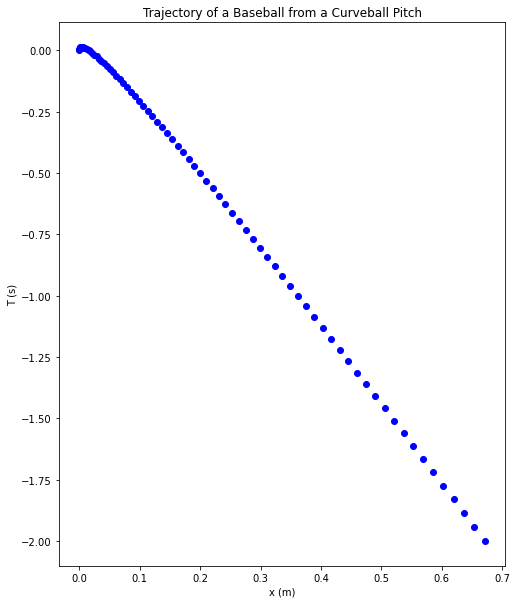

In [15]:
t = 0 #time in s
h = .008 #time step in s

# data for pitch
vmag0mph = 79.3 #mph
thetadeg = 1 #degx
spinrate = 2548

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

x0 = 0
y0 = 0
z0 = 0
vx0 = 0
vy0 = vmag0*np.sin(theta)   
vz0 = vmag0*np.cos(theta)

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
thetaomega = 45*np.pi/180
omega = omegamag*np.array([np.cos(thetaomega), np.sin(thetaomega), 0]) #omegacostheta , omegasintheta for angled pitches
#omega = np.array([-omegamag*np.cos(theta), -omegamag*np.sin(theta), 0])
# array for instanomega = np.array([-omegamag, 0, 0])taneous position and velocity data
data = np.array([x0, y0, z0, vx0, vy0, vz0, omega[0], omega[1], omega[2]])

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x0)
ylist.append(y0)
zlist.append(z0)

z = z0

while z < 20.2:

    data = ode.RK4(forcesoftheball, data, t, h)
    t = t + h

    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)

plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("x (m)")
plt.ylabel("T (s)")
plt.plot(xlist, ylist, 'bo')
plt.show()

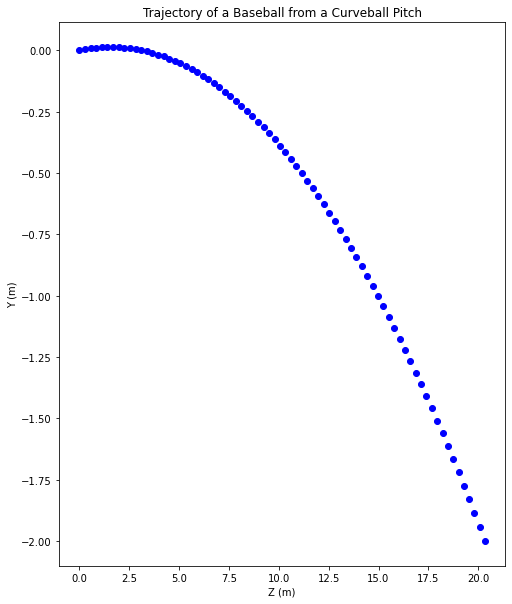

In [17]:
plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("Z (m)")
plt.ylabel("Y (m)")
plt.plot(zlist, ylist, 'bo')
plt.show()

# What is Velocities Effect?

Now after completing the model of a curveball and being able to determine the displacement of the ball over time. I then took the same Cell that i had previous for the next two cells, but to see the difference based on the velocity. In this first cell I used 70 miles per hour curveball and found that ball would only have a little over a 0.1m change in the X displacement but in the Y displacement there was a major .5m increase in the displacement. In the following cell i used 88 miles per hour curveball and found that the ball had just about a 0.1m decrease in the x-axis and about a .4m drop in diplacement for the y-axis

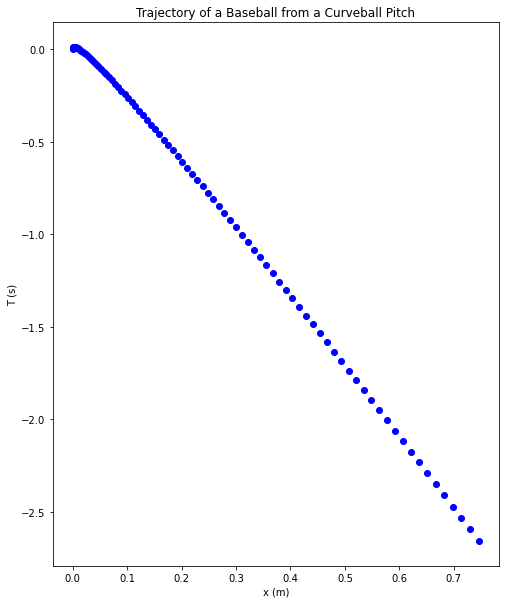

In [20]:
t = 0 #time in s
h = .008 #time step in s

# data for pitch
vmag0mph = 70 #mph
thetadeg = 1 #degx
spinrate = 2548

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

x0 = 0
y0 = 0
z0 = 0
vx0 = 0
vy0 = vmag0*np.sin(theta)   
vz0 = vmag0*np.cos(theta)

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
thetaomega = 45*np.pi/180
omega = omegamag*np.array([np.cos(thetaomega), np.sin(thetaomega), 0]) #omegacostheta , omegasintheta for angled pitches
#omega = np.array([-omegamag*np.cos(theta), -omegamag*np.sin(theta), 0])
# array for instanomega = np.array([-omegamag, 0, 0])taneous position and velocity data
data = np.array([x0, y0, z0, vx0, vy0, vz0, omega[0], omega[1], omega[2]])

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x0)
ylist.append(y0)
zlist.append(z0)

z = z0

while z < 20.2:

    data = ode.RK4(forcesoftheball, data, t, h)
    t = t + h

    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)

plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("x (m)")
plt.ylabel("T (s)")
plt.plot(xlist, ylist, 'bo')
plt.show()

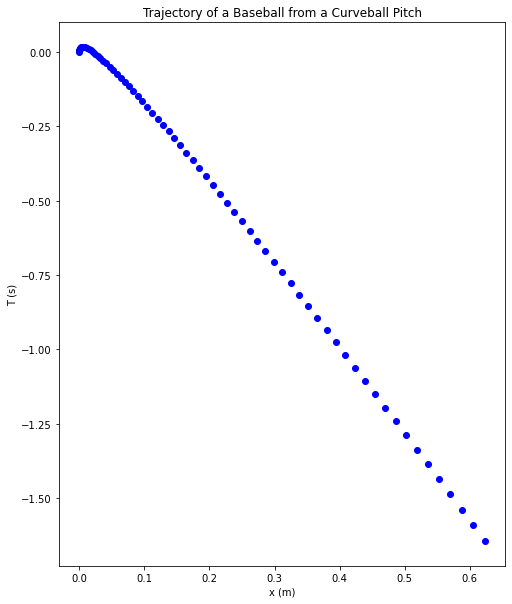

In [21]:
t = 0 #time in s
h = .008 #time step in s

# data for pitch
vmag0mph = 88 #mph
thetadeg = 1 #degx
spinrate = 2548

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

x0 = 0
y0 = 0
z0 = 0
vx0 = 0
vy0 = vmag0*np.sin(theta)   
vz0 = vmag0*np.cos(theta)

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
thetaomega = 45*np.pi/180
omega = omegamag*np.array([np.cos(thetaomega), np.sin(thetaomega), 0]) #omegacostheta , omegasintheta for angled pitches
#omega = np.array([-omegamag*np.cos(theta), -omegamag*np.sin(theta), 0])
# array for instanomega = np.array([-omegamag, 0, 0])taneous position and velocity data
data = np.array([x0, y0, z0, vx0, vy0, vz0, omega[0], omega[1], omega[2]])

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x0)
ylist.append(y0)
zlist.append(z0)

z = z0

while z < 20.2:

    data = ode.RK4(forcesoftheball, data, t, h)
    t = t + h

    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)

plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("x (m)")
plt.ylabel("T (s)")
plt.plot(xlist, ylist, 'bo')
plt.show()

# Conclussion

In conclussion after succesfully being able to model the curveball and keep track of the displacement fomr the pitchers hand to the plate. I found that my hypothesis was infact correct and that the fater the curveball is thrown the lower the displacement is due to the decrease in time for gravity and the spin to effect the balls trajectory